In [2]:
'''
Data Set Information:

The Washington State Department of Health presents this information as a service to the public. This includes information on the work status, practice characteristics, education, and demographics of healthcare providers, provided in response to the Washington Health Workforce Survey.

This is a complete set of data across all of the responding professions. The data dictionary identifies questions that are specific to an individual profession and aren't common to all surveys. The dataset is provided without identifying information for the responding providers.

More information on the Washington Health Workforce Survey can be found at www.doh.wa.gov/workforcesurvey'''

import pandas as pd 
df = pd.read_csv('https://data.wa.gov/api/views/cvrw-ujje/rows.csv?accessType=DOWNLOAD')



In [38]:
##importing packagest

import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sea 
from scipy import stats
import math
import statsmodels.api


In [4]:
##Creating an age column out of healthcare worker birth years
df['Age'] = 2020 - df['BirthYear']
df['Age'] = np.floor(df['Age'])

In [5]:
##Identifying different racial and ethnic groups
print(df.Race.unique())
print(df.Ethnicity.unique())

[nan 'White' 'Asian'
 'Black African American,American Indian or Alaska Native'
 'Black African American' 'White,American Indian or Alaska Native'
 'White,Asian'
 'White,Black African American,American Indian or Alaska Native,Native Hawaiian Pacific Islander'
 'Native Hawaiian Pacific Islander' 'White,Black African American'
 'Asian,Native Hawaiian Pacific Islander'
 'American Indian or Alaska Native'
 'White,Black African American,American Indian or Alaska Native'
 'Black African American,Asian'
 'White,Black African American,Asian,Native Hawaiian Pacific Islander'
 'BlackAfricanAmerican' 'White,AmericanIndianOrAlaskaNative'
 'White,Asian,Native Hawaiian Pacific Islander'
 'White,Black African American,American Indian or Alaska Native,Asian,Native Hawaiian Pacific Islander'
 'AmericanIndianOrAlaskaNative' 'White,Native Hawaiian Pacific Islander'
 'White,Black African American,Asian'
 'White,Black African American,Native Hawaiian Pacific Islander'
 'American Indian or Alaska Native,Nat

In [6]:
##Creating columns for racial categories. 
def race_finder (race, data):
    colName = 'Is' + race
    data[colName] = 0
    for i in range(len(df)):
        if race == 'NA' and type(data['Race'][i]) is float:
            df[colName][i] = 1
        elif str(data['Race'][i]).find(race) != -1:
            data[colName][i] = 1
        else:
            data[colName][i] = 0 
    return data  

df = race_finder('White', df)
df = race_finder('Black', df)
df = race_finder('Asian', df)
df = race_finder('Indian', df)
df = race_finder('Pacific', df)
df = race_finder('NA', df)


In [7]:
##Creating a column for hispanic identiification
df['IsHispanic'] = 0
count = 0
for i in range(len(df)):
    entry = df['Ethnicity'][i]
    if type(entry) is float:
        df['IsHispanic'][i] = 0
    elif entry != 'No':
        df['IsHispanic'][i] = 1
        count = count + 1
    else:
        df['IsHispanic'][i] = 0


In [8]:
#creating sub tables for further analysis
white = df[df['IsWhite'] == 1]
nonWhite = df[df['IsWhite'] == 0]
black = df[df['IsBlack'] == 1]
nonBlack = df[df['IsBlack'] == 0]
asian = df[df['IsAsian'] == 1]
nonAsian = df[df['IsAsian'] == 1]
americanIndian = df[df['IsIndian'] == 1]
notIndian = df[df['IsIndian'] == 0]
pacificIslander = df[df['IsPacific'] == 1]
notPacificIslander = df[df['IsPacific'] == 0]
hispanic = df[df['IsHispanic'] == 1]
notHispanic = df[df['IsHispanic'] == 0]
noRace = df[df['IsNA'] == 1]
hasRace = df[df['IsNA'] == 0]

In [9]:
##Function defining an A/B test analysis for two data sets
def A_B_test (a_set, b_set):
    a_skew = a_set.skew()
    a_kurtosis = a_set.kurtosis()
    a_size = len(a_set)
    a_var = a_set.var()
    a_mean = a_set.mean()
    b_skew = b_set.skew()
    b_kurtosis = b_set.kurtosis()
    b_size = len(b_set)
    b_var = b_set.var()
    b_mean = b_set.mean()
    print('The Sample Size of the A group is:', a_size)
    print('The Mean of the A group is:', a_mean)
    print('The Variance of the A group is:', a_var)
    print('The Skew of the A group is:', a_skew)
    print('The Kurtosis of the A group is:', a_kurtosis)
    print('\n')
    print('The Sample Size of the B group is:', b_size)
    print('The Mean of the B group is:', b_mean)
    print('The Variance of the B group is:', b_var)
    print('The Skew of the B group is:', b_skew)
    print('The Kurtosis of the B group is:', b_kurtosis)
    print('\n')
    print('The Difference in Means between A and B is:', a_mean - b_mean)


In [10]:
##Function defining a 95% CI for the difference in two data sets
def get_95_ci(data1, data2):
    n1 = len(data1)
    n2 = len(data2)
    sd1 = np.std(data1)
    sd2 = np.std(data2)
    m1 = data1.mean()
    m2 = data2.mean()
    uci = m1 - m2 + 1.96 * np.sqrt((sd1**2/n1)+(sd2**2/n2))
    lci = m1 - m2 - 1.96 * np.sqrt((sd1**2/n1)+(sd2**2/n2))
    print('Upper Confidence Interval: ' + str(uci))
    print('Lower Confidence Interval: ' + str(lci))

In [11]:
##Function defining a full t-test analysis for two data sets and a given variable
def t_test_analysis(a, b, var):
    A_B_test(a[var], b[var])
    print('\n')
    print('t-test results:', stats.ttest_ind(a[var], b[var], nan_policy='omit'))
    print('\n')
    get_95_ci(a[var], b[var])



In [12]:
#Function defining a non-parametric analysis for non-normally distributed data
def non_parametric_analysis(a, b, var):
    a_median = a[var].median()
    b_median = b[var].median()

    a_mean = a[var].mean()
    b_mean = b[var].mean()

    print('\n' + 'A median:', a_median)
    print('\n' + 'A mean:', a_mean)

    print('\n' + 'B median:', b_median)
    print('\n' + 'B mean:', b_mean)

    print('\n' + 'Difference in Medians:', a_median - b_median)
    print('\n' + 'Difference in Means:', a_mean - b_mean)

    print('\n' + str(stats.mannwhitneyu(a[var], b[var])))

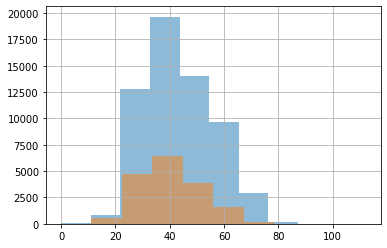

The Sample Size of the A group is: 60842
The Mean of the A group is: 43.177657717562965
The Variance of the A group is: 160.23187771340898
The Skew of the A group is: 0.37688728167082713
The Kurtosis of the A group is: -0.5683961352088582


The Sample Size of the B group is: 19260
The Mean of the B group is: 40.28419723322427
The Variance of the B group is: 123.75269457510372
The Skew of the B group is: 0.4970636529733381
The Kurtosis of the B group is: -0.001897949006564037


The Difference in Means between A and B is: 2.8934604843386964


t-test results: Ttest_indResult(statistic=27.27389521528515, pvalue=5.1157802560667e-163)


Upper Confidence Interval: 3.0800060976210144
Lower Confidence Interval: 2.7069148710563784


In [13]:
##H1: There is a significant difference between the age of White and Non-White identifying healthcare providers
white['Age'].hist(alpha=0.5)
nonWhite['Age'].hist(alpha=0.5)
plt.show()
#Looks Normally Distributed 

t_test_analysis(white, nonWhite, 'Age')

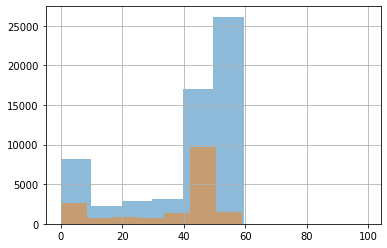


A median: 49.0

A mean: 38.94573016166127

B median: 48.0

B mean: 37.47202419492247

Difference in Medians: 1.0

Difference in Means: 1.4737059667387982

MannwhitneyuResult(statistic=566100095.5, pvalue=2.5271708999475345e-13)


In [14]:
#H2: There is a significant difference between the number of weeks worked by White and Non-White identifying healthcare providers
white['AnnualWeeksWorked'].hist(alpha=0.5)
nonWhite['AnnualWeeksWorked'].hist(alpha=0.5)
plt.show()
##Non-Normally Distributed

non_parametric_analysis(white, nonWhite, 'AnnualWeeksWorked')


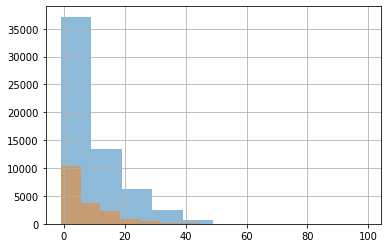


A median: 5.0

A mean: 8.993560483036994

B median: 4.0

B mean: 6.985864528614874

Difference in Medians: 1.0

Difference in Means: 2.00769595442212

MannwhitneyuResult(statistic=552050899.0, pvalue=3.414212931167146e-34)


In [15]:
#H3: There is a significant difference between the number of years practiced between White and Non-White identifying healthcare professionals
white['NumberYearsPracticeWashington'].hist(alpha=0.5)
nonWhite['NumberYearsPracticeWashington'].hist(alpha=0.5)
plt.show()
#Non-Normally Distributed

non_parametric_analysis(white, nonWhite, 'NumberYearsPracticeWashington')

In [29]:
##H4: There is a significant difference in the proportion of healthcare providers who can communicate in another language betwen white and non-white identifying healthcare providers
otherLanguage = len(df[df['CommunicateOtherLanguage'] == True]) / len(df)
whiteOtherLanguage = len(white[white['CommunicateOtherLanguage'] == True]) / len(white)
nonWhiteOtherLanguage = len(nonWhite[nonWhite['CommunicateOtherLanguage'] == True]) / len(nonWhite)
print('Proportion of providers that can speak another language:', otherLanguage)
print('Proportion of White providers that can speak another language:', whiteOtherLanguage)
print('Proportion of Non-White providers that can speak another language:', nonWhiteOtherLanguage)

Proportion of providers that can speak another language: 0.260767521410202
Proportion of White providers that can speak another language: 0.17331777390618322
Proportion of Non-White providers that can speak another language: 0.5370197300103842


In [40]:
#z-test for proportion
statsmodels.stats.proportion.proportions_ztest([len(white[white['CommunicateOtherLanguage'] == True]), len(nonWhite[nonWhite['CommunicateOtherLanguage'] == True])], [len(white), len(nonWhite)])

(-100.19281298347586, 0.0)

(10.855683218246591, 1.8740007666264493e-27)